# Statistical Analysis Final Project

### **Name:** Chandler Dykes
### **Date:** 11/12/2023
### **Class:** STAT 5000

<div align="center">
<h1>Flight Satistfaction Classification - An Analysis of Variables Leading to Customer Satisfaction</h1>
<p>
This analysis will attempt to discover the key characteristics leading to a flyer's satisfaction. From, the analysis, we hope to discover the most important things an airline should focus on in order to keep customer satisfaction high.
</p>
</div>

### First Impressions of Data

In [47]:
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [48]:
test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [49]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


We can remove some unecessary columns from the data as we won't need them for the analysis.

In [50]:
train_data = train_data.drop(['Unnamed: 0', 'id'], axis=1)
test_data = test_data.drop(['Unnamed: 0', 'id'], axis=1)

In [51]:
test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [52]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


We also need to check for missing data and handle it accordingly. 

In [53]:
print(test_data.shape)
test_data = test_data.dropna()
print(test_data.shape)

(25976, 23)
(25893, 23)


In [54]:
print(train_data.shape)
train_data = train_data.dropna()
print(train_data.shape)

(103904, 23)
(103594, 23)


Considering the amount of data we have, dropping the null values instead of handling them in some other way will be okay.

In [55]:
train_data.loc[train_data['Customer Type'] == 'disloyal Customer', 'Customer Type'] = 'Disloyal Customer'
test_data.loc[test_data['Customer Type'] == 'disloyal Customer', 'Customer Type'] = 'Disloyal Customer'

### Exploratory Data Analysis

Now that the data has been set up in a way that makes an analysis easier, let's visualize it. 

Just from general experience, one would assume that customers would usually have a bias towards their specific airline if they are loyal customers to that airline. 
Let's test that theory out. 

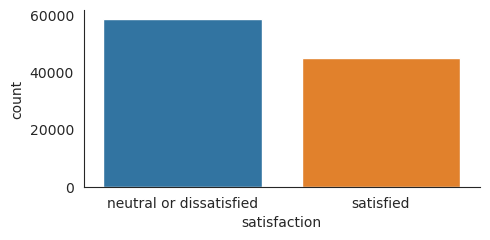

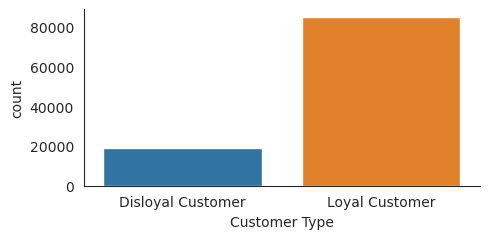

In [56]:
import seaborn as sns

with sns.axes_style(style='white'):
    g = sns.catplot(x="satisfaction", data=train_data, aspect=2, kind="count", height=2.5)
    g = sns.catplot(x="Customer Type", data=train_data, aspect=2, kind="count", height=2.5, order=['Disloyal Customer', 'Loyal Customer'])

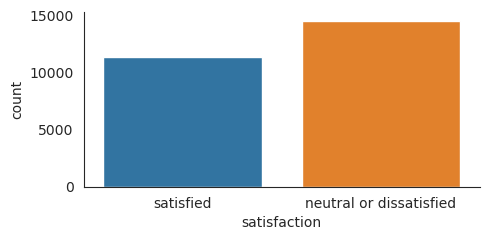

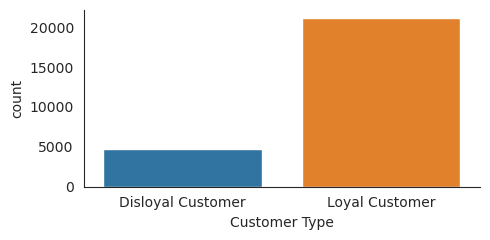

In [57]:
with sns.axes_style(style='white'):
    g = sns.catplot(x="satisfaction", data=test_data, aspect=2, kind="count", height=2.5)
    g = sns.catplot(x="Customer Type", data=test_data, aspect=2, kind="count", height=2.5, order=['Disloyal Customer', 'Loyal Customer'])

The vast majority of customers are loyal customers. Surprisingly, that doesn't seem to have as much of an effect as one would think. Also, from these plots we see that the amount of satisfied vs dissatisfied customers is roughly equal, so no data normalization in that sense needs to be done.

### Encoding Categorical Variables

In [58]:
from sklearn.preprocessing import LabelEncoder
for col in train_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    
for col in test_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])

### Outlier Removal

In [59]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1   
train_data = train_data[~((train_data < (Q1 - 1.5 * IQR)) |(train_data > (Q3 + 1.5 * IQR))).any(axis=1)]

### Correlation Test

/home/cjd0067/anaconda3/envs/stats_env/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


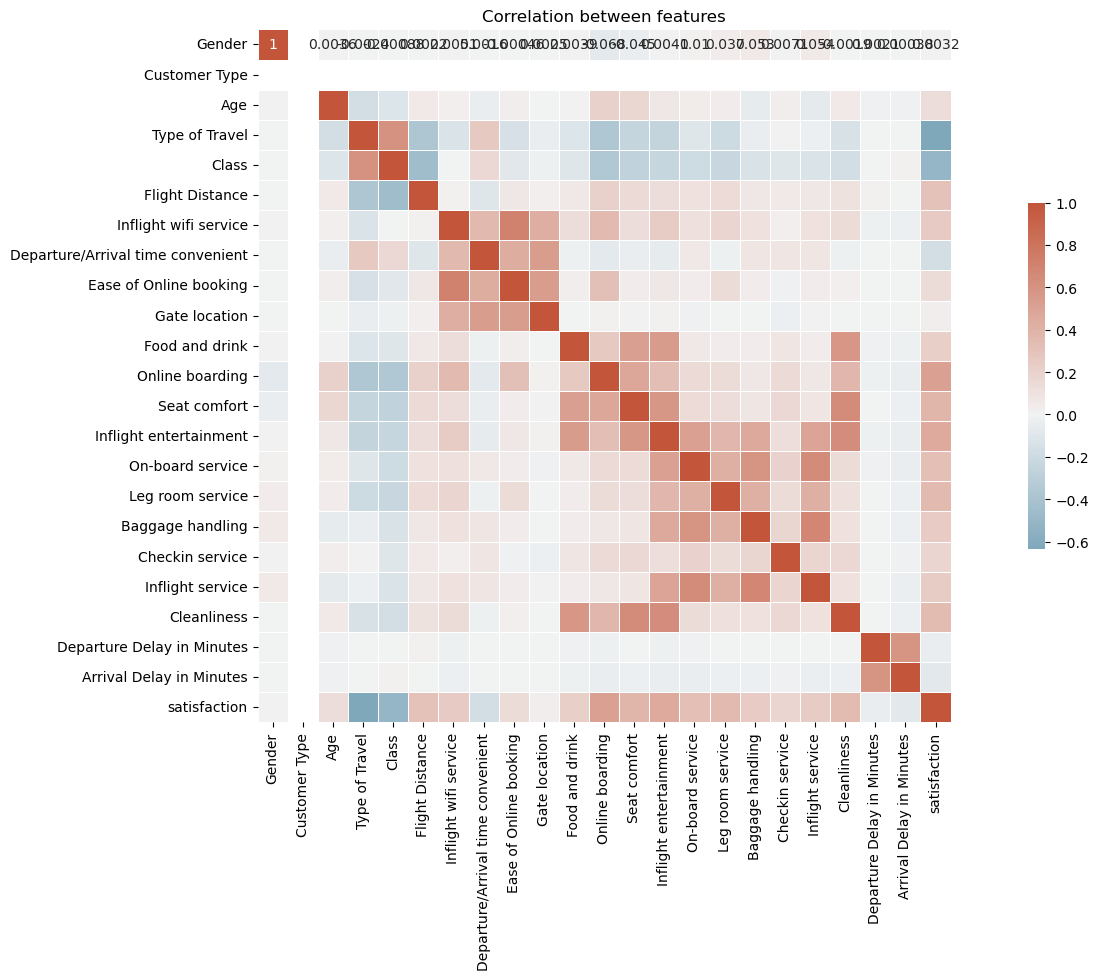

In [60]:
import matplotlib.pyplot as plt

corr = train_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation between features')
plt.show()

From the correlation plot, we can see that many of the variables do have some sort of correlation, but none are equal to one, so we do not need to remove any variables.

### Feature Selection

We have a lot of variables in our data, so let's see if we can reduce the number of dimensions using Froward Selection.

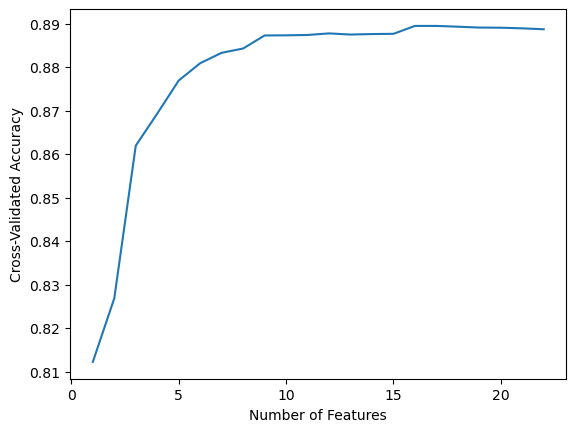

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

X = train_data.drop(['satisfaction'], axis=1)
y = train_data['satisfaction']

model = LogisticRegression(solver='lbfgs', max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
fit = rfe.fit(X, y)
ranking = fit.ranking_
sorted_ranking_idx = sorted(range(len(ranking)), key=lambda idx: ranking[idx])
sorted_features = [X.columns[idx] for idx in sorted_ranking_idx]

def score_model(X, y, estimator, num_features):
    cv = StratifiedKFold(n_splits=5)
    scores = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        X_train_reduced = X_train[sorted_features[:num_features]]
        X_test_reduced = X_test[sorted_features[:num_features]]
        
        estimator.fit(X_train_reduced, y_train)
        preds = estimator.predict(X_test_reduced)
        score = accuracy_score(y_test, preds)
        scores.append(score)
    
    return np.mean(scores)

results = {}
for i in range(1, len(sorted_features) + 1):
    results[i] = score_model(X, y, LogisticRegression(max_iter=10000), i)

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

best_num_features = max(results, key=results.get)
selected_features_final = sorted_features[:best_num_features]

The feature selection yielded the following features (from most to least important):
1. Type of Travel
2. Online boarding
3. On-board service
4. Cleanliness
5. Leg room service
6. Checkin service
7. Class
8. Inflight wifi service
9. Ease of Online booking
10. Baggage handling
11. Seat comfort
12. Departure/Arrival time convenient
13. Inflight service
14. Gate location
15. Gender
16. Arrival Delay in Minutes


### Models

Now, let's run some models against our data. The models chosen are:
1. Logistic Regression
2. KNN Classifier
3. Decision Tree Classifier

In [62]:
from sklearn.preprocessing import StandardScaler

X_train = train_data[selected_features_final]
y_train = train_data['satisfaction']

X_test = test_data[selected_features_final]
y_test = test_data['satisfaction']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
import time
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix
from matplotlib import pyplot as plt

def execute_model(model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    train_time = end - start
    print('Training time: ', train_time)
    
    start = time.time()
    preds = model.predict(X_test)
    end = time.time()
    pred_time = end - start
    print('Prediction time: ', pred_time)
    print('Accuracy score: ', accuracy_score(y_test, preds))
    print('ROC AUC score: ', roc_auc_score(y_test, preds))
    print('Classification report: \n', classification_report(y_test, preds))
    
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neutral or dissatisfied', 'satisfied'])
    disp.plot()
    plt.show()
    
    disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()    
    return model, accuracy_score(y_test, preds), roc_auc_score(y_test, preds), train_time, pred_time

In [99]:
results = {}

#### Logistic Regression

Training time:  0.15418529510498047
Prediction time:  0.0024051666259765625
Accuracy score:  0.8212258139265438
ROC AUC score:  0.8205052161361782
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     14528
           1       0.79      0.81      0.80     11365

    accuracy                           0.82     25893
   macro avg       0.82      0.82      0.82     25893
weighted avg       0.82      0.82      0.82     25893



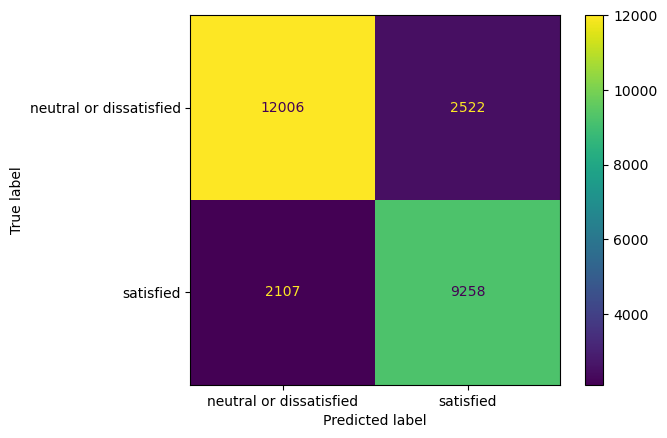

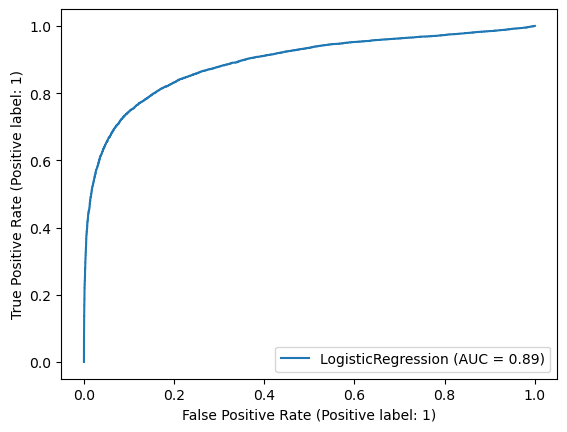

In [100]:
from sklearn.linear_model import LogisticRegression

lm_model = LogisticRegression(solver='lbfgs')
lm_result = execute_model(lm_model, X_train, y_train, X_test, y_test)
results['Logistic Regression'] = lm_result

The model shows a commendable ability to classify instances into 'neutral or dissatisfied' and 'satisfied' with high accuracy, precision, and recall. Its efficiency in training and prediction times makes it suitable for scenarios requiring quick model updates and real-time predictions. However, there is room for improvement, particularly in reducing false positives for the 'satisfied' class, as indicated by the lower precision.

### KNN Classifier

Training time:  0.004655122756958008
Prediction time:  1.5408780574798584
Accuracy score:  0.8872282083960916
ROC AUC score:  0.8854720184128566
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     14528
           1       0.87      0.87      0.87     11365

    accuracy                           0.89     25893
   macro avg       0.89      0.89      0.89     25893
weighted avg       0.89      0.89      0.89     25893



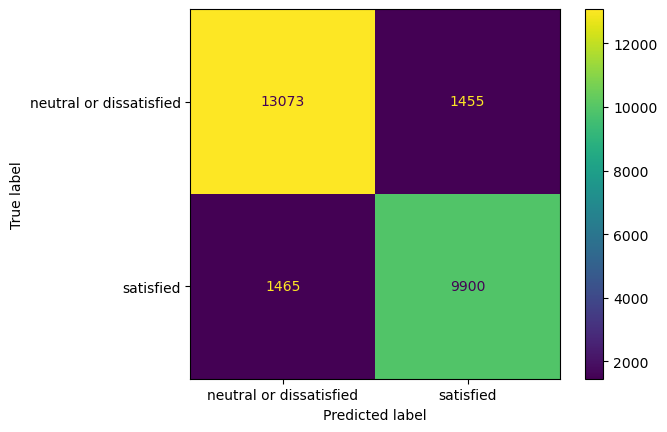

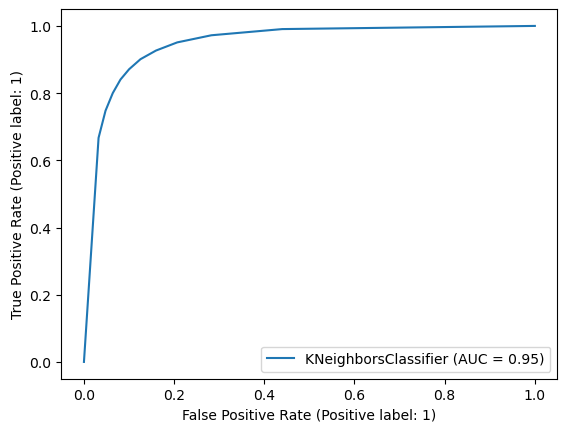

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_result = execute_model(knn_model, X_train, y_train, X_test, y_test)
results['KNN'] = knn_result

The KNN model demonstrates excellent performance in terms of accuracy, precision, recall, and F1-score for both classes. However, its significant prediction time could be a drawback, especially in scenarios requiring real-time predictions or when working with very large datasets. This model is particularly effective in distinguishing between the two classes, as evidenced by the high ROC AUC score. The balanced precision and recall suggest that the model is reliable in both identifying true instances of each class and minimizing false classifications.

### Random Forest Classifier

Training time:  2.987959861755371
Prediction time:  0.27628231048583984
Accuracy score:  0.8927123160699802
ROC AUC score:  0.8992766429702445
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     14528
           1       0.83      0.95      0.89     11365

    accuracy                           0.89     25893
   macro avg       0.89      0.90      0.89     25893
weighted avg       0.90      0.89      0.89     25893



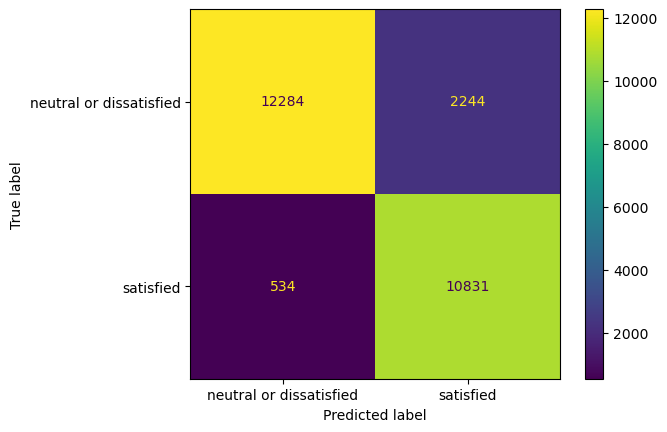

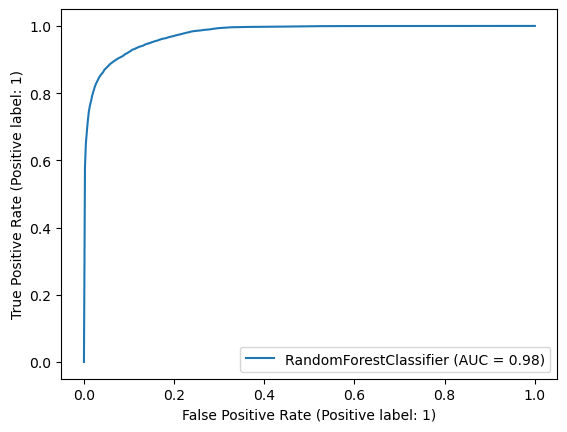

In [102]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100)
rfc_result = execute_model(rfc_model, X_train, y_train, X_test, y_test)
results['Random Forest'] = rfc_result

The Random Forest Classifier also demonstrates excellent performance in terms of precision, recall, accuracy, and ROC AUC score. The model shows a particularly strong ability to minimize false positives, as evidenced by the high AUC for false positives. This makes it a suitable choice for applications where avoiding false positives is crucial. However, the longer training time should be considered in scenarios requiring frequent retraining.

## Comparison of models

Now that we have gathered our data from the models, let's compare them. 

In [103]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Model', 'Accuracy', 'ROC AUC', 'Train Time', 'Prediction Time'])
styled_df = results_df.style.background_gradient(cmap='Blues').format({'Accuracy': '{:.2%}', 'ROC AUC': '{:.2%}', 'Train Time': '{:.10f} s', 'Prediction Time': '{:.10f} s'})
styled_df

,Model,Accuracy,ROC AUC,Train Time,Prediction Time
Logistic Regression,LogisticRegression(),82.12%,82.05%,0.1541852951 s,0.0024051666 s
KNN,KNeighborsClassifier(n_neighbors=10),88.72%,88.55%,0.0046551228 s,1.5408780575 s
Random Forest,RandomForestClassifier(),89.27%,89.93%,2.9879598618 s,0.2762823105 s


**Logistic Regression** shows decent performance with an accuracy of 82.12% and a ROC AUC score of 82.05%, indicating a good ability to classify and distinguish between the classes. It stands out in terms of computational efficiency, with the shortest training and prediction times among the three models. This makes it an excellent choice for applications where speed and resource efficiency are crucial.
<br>

**KNN** demonstrates a higher accuracy and ROC AUC score compared to Logistic Regression, indicating a stronger classification performance. The model is characterized by an extremely short training time, attributed to its lazy learning nature. However, it has a substantially longer prediction time, which is a critical consideration for real-time applications.
<br>

**Random Forest** leads in terms of accuracy and ROC AUC, suggesting it is the most capable model in terms of classification performance and distinguishing between classes. It has the longest training time, which is expected given its complexity and the nature of constructing multiple decision trees. The prediction time is moderate, making it a viable option for applications where higher predictive accuracy is prioritized over speed.

# Conclusion:

In summary, each model presents a different trade-off between accuracy and computational efficiency. Logistic Regression is the most efficient in terms of computation time but offers slightly lower accuracy. KNN, while having the highest prediction time, provides better accuracy. Random Forest emerges as the most accurate model but requires the longest training time. The choice of model should be guided by the specific requirements of the application, considering factors like the need for real-time predictions, computational resources, and the importance of predictive accuracy.

Also, from feature selection, we have discovered the most important aspects of a customer's flight experience that could lead to a satisfied customer.